In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load the residual

In [2]:
residual = np.load("GLASS_PSD_fixed.npz")

In [3]:
list(residual.keys())

['f',
 'DATA_A',
 'DATA_E',
 'DATA_T',
 'NOISEMODEL_A',
 'NOISEMODEL_E',
 'NOISEMODEL_T',
 'PSDMODEL_A',
 'PSDMODEL_E',
 'PSDMODEL_T']

In [4]:
f = residual['f']
A = residual['DATA_A']
E = residual['DATA_E']
T = residual['DATA_T']
psdA = residual['PSDMODEL_A']
psdE = residual['PSDMODEL_E']
psdT = residual['PSDMODEL_T']

In [5]:
A

array([8.14661854e-36, 4.34446262e-36, 1.76535873e-36, ...,
       2.88239376e-40, 6.40885105e-40, 4.04325257e-40], shape=(3144959,))

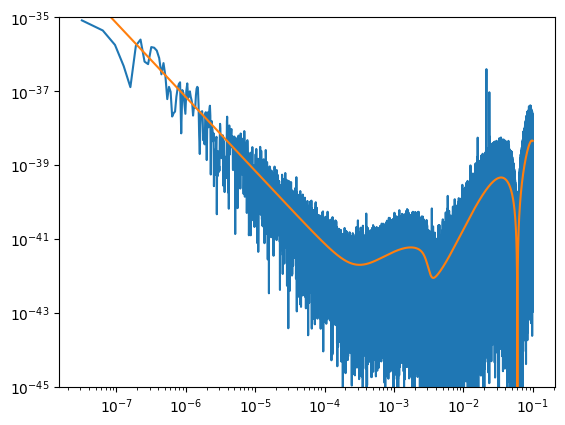

In [6]:
plt.loglog(f,A)
plt.loglog(f,psdA)
plt.ylim([1e-45,1e-35])
plt.show()

# generate and inject mbhb

In [7]:
from bbhx.waveformbuild import BBHWaveformFD
from lisatools.utils.constants import *

No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU interpolation available.
No CuPy or GPU response available.


/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/bbhx/utils/transform.py:303: SyntaxWarning: invalid escape sequence '\l'
  Longitudinal modes involve :math:`\lambda + (0, 1, 2, 3)\\times\pi/2` and
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/bbhx/utils/citations.py:97: SyntaxWarning: invalid escape sequence '\p'
  journal = {\prl},
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/bbhx/utils/citations.py:113: SyntaxWarning: invalid escape sequence '\s'
  author = {Husa, S and Khan, S and Hannam, M and P{\"{u}}rrer, M and Ohme, F and Forteza, X.$\sim$J. and Boh{\'{e}}, A},


In [16]:
# sangria MBHB #3
import pandas as pd
df = pd.read_csv('sangria_mbhbs.csv')
test_mbhb = df.iloc[2]
test_mbhb

EclipticLatitude          6.360284e-01
EclipticLongitude         7.791590e-01
PolarAngleOfSpin1         2.332027e+00
PolarAngleOfSpin2         2.065443e+00
Spin1                     5.741220e-01
Spin2                     5.926710e-01
Mass1                     1.773563e+06
Mass2                     1.083356e+06
CoalescenceTime           1.116784e+07
PhaseAtCoalescence        2.311127e+00
InitialPolarAngleL        2.328022e-01
InitialAzimuthalAngleL    3.798411e+00
Redshift                  6.034960e+00
Distance                  5.947224e+04
ObservationDuration       3.155815e+07
Cadence                   3.000000e+00
Name: 2, dtype: float64

In [29]:
m1 = 2e6
m2 = 7e5
chi1 = 0.5
chi2 = 0.7
dist = 15 * 1e9 * PC_SI
phi_ref = 0.6
f_ref = 0.0
inc = np.pi / 8
lam = 3.4
beta = -0.7
psi = np.pi/4
t_ref = 1e6 # seconds

length=1024

# setup data holders
Tobs = YRSID_SI / 12.  # 1 month
dt = 10.0  # sec
N = int(Tobs / dt)
Tobs = N * dt

freqs = np.fft.rfftfreq(N, dt)

tdi_wave_gen = BBHWaveformFD(response_kwargs={'TDItag':'AET'})
AET = tdi_wave_gen(
    m1,
    m2, 
    chi1,
    chi2,
    dist, 
    phi_ref,
    f_ref, 
    inc,
    lam,
    beta,
    psi,
    t_ref,
    length=1024, 
    combine=False,  # TODO: check this
    direct=False,
    fill=True,
    squeeze=True,
    freqs=freqs
)

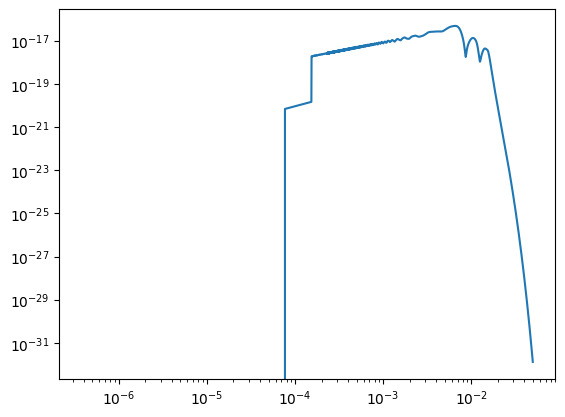

In [25]:
plt.loglog(freqs, np.abs(AET[0,0,:]))

In [32]:
from lisatools.datacontainer import DataResidualArray
from lisatools.sensitivity import AET1SensitivityMatrix
from lisatools.analysiscontainer import AnalysisContainer

/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/diagnostic.py:42: SyntaxWarning: invalid escape sequence '\l'
  \langle a | b \\rangle = 2\int_{f_\\text{min}}^{f_\\text{max}} \\frac{\\tilde{a}(f)^*\\tilde{b}(f) + \\tilde{a}(f)\\tilde{b}(f)^*}{S_n(f)} df\ \ ,
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/diagnostic.py:301: SyntaxWarning: invalid escape sequence '\ '
  \\log{\\mathcal{L}}_\\text{src} = -\\frac{1}{2}\\left(\\langle \\vec{d} | \\vec{d}\\rangle + \\langle \\vec{h} | \\vec{h}\\rangle - 2\\langle \\vec{d} | \\vec{h}\\rangle \\right)\ \ .


In [33]:
data = DataResidualArray(AET[0], f_arr = freqs)
# TODO need to add glass residual to data, and use known PSD in sensitivity matrix
sens_mat = AET1SensitivityMatrix(data.f_arr)

/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/detector.py:633: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/detector.py:635: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/detector.py:637: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/detector.py:642: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/lisatools/detector.py:644: RuntimeWarning: invalid value encountered in multiply
  Soms_nu = Soms_d * (2.0 * np.pi * frq / C_SI) **

In [34]:
def wrap(*args, **kwargs):
    return tdi_wave_gen(*args, **kwargs)[0]

In [36]:
analysis = AnalysisContainer(data, sens_mat, signal_gen=wrap)
analysis.snr()

3121.443697068461

In [37]:
analysis.calculate_signal_likelihood(
    m1 * 1.0001,
    m2, 
    chi1,
    chi2,
    dist, 
    phi_ref,
    f_ref, 
    inc,
    lam,
    beta,
    psi,
    t_ref,
    waveform_kwargs=dict(
        length=1024, 
        combine=False,  # TODO: check this
        direct=False,
        fill=True,
        squeeze=True,
        freqs=freqs
    ),
    source_only=True
    # data_arr_kwargs=dict(f_arr=freqs)
)

np.float64(-6.891987033188343)

In [38]:
from eryn.ensemble import EnsembleSampler
from eryn.prior import ProbDistContainer, uniform_dist
from eryn.state import State
from eryn.backends import HDFBackend

/Users/rjrosati/code/mbhb-bias/.venv/lib/python3.13/site-packages/eryn/moves/move.py:446: SyntaxWarning: invalid escape sequence '\l'
  :math:`\log{P} = \log{L} + \log{p}`


In [39]:
def wrapper_likelihood(x, fixed_parameters, freqs, analysis, **kwargs):
    all_parameters = np.zeros(12)
    mT = x[0]
    q = x[1]
    all_parameters[0] = mT / (1 + q)
    all_parameters[1] = mT * q / (1 + q)
    all_parameters[5] = x[2]
    all_parameters[-1] = x[3]

    all_parameters[np.array([2, 3, 4, 6, 7, 8, 9, 10])] = fixed_parameters

    ll = analysis.calculate_signal_likelihood(
        *all_parameters,
        waveform_kwargs=dict(
            length=1024, 
            combine=False,  # TODO: check this
            direct=False,
            fill=True,
            squeeze=True,
            freqs=freqs
        ),
        source_only=True
        # data_arr_kwargs=dict(f_arr=freqs)
    )
    return ll

In [42]:
priors = {"mbh": ProbDistContainer({
    0: uniform_dist(1e5, 3e6),
    1: uniform_dist(0.05, 0.999999),
    2: uniform_dist(0.0, 2 * np.pi),
    3: uniform_dist(0.0, Tobs + 24 * 3600.0),
})}

injection_params = np.array([
    m1 + m2,
    m2 / m1,
    chi1,
    chi2,
    dist, 
    phi_ref,
    f_ref, 
    inc,
    lam,
    beta,
    psi,
    t_ref
])

fixed_parameters = np.array([
    chi1,
    chi2,
    dist, 
    f_ref, 
    inc,
    lam,
    beta,
    psi,
])

periodic = {"mbh": {2: 2 * np.pi}}

ntemps = 10
nwalkers = 32
ndims = {"mbh": 4}
sampler = EnsembleSampler(
    nwalkers,
    ndims,
    wrapper_likelihood,
    priors,
    args=(fixed_parameters, freqs, analysis),
    branch_names=["mbh"],
    tempering_kwargs=dict(ntemps=ntemps),
    nleaves_max=dict(mbh=1),
    periodic=periodic
)

In [43]:
injection_params_sub = np.array([m1 + m2, m2 / m1, phi_ref, t_ref])
start_params = injection_params_sub[None, None, None, :] * (1 + 1e-7 * np.random.randn(ntemps, nwalkers, 1, injection_params_sub.shape[0]))
start_state = State({"mbh": start_params})
sampler.compute_log_prior(start_state.branches_coords)
sampler.run_mcmc(start_state, 10, progress=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:17<00:00, 13.76s/it]


In [45]:
from bbhx.likelihood import HeterodynedLikelihood

No CuPy


In [46]:
# clear (for internal clearing of answers)
 
# how many frequencies to use
length_f_het = 128

mT = injection_params[0]
q = injection_params[1]

transformed_injection_params = injection_params.copy()
transformed_injection_params[0] = mT / (1 + q)
transformed_injection_params[1] = mT * q / (1 + q)
# initialize Likelihood
like_het = HeterodynedLikelihood(
    tdi_wave_gen,
    freqs,
    data[:],
    transformed_injection_params,
    length_f_het,
)

like_het.get_ll(transformed_injection_params[None, :].T)

array([-0.00082151])

In [47]:
# clear (for internal clearing of answers)
 
def het_wrapper_likelihood(x, fixed_parameters, freqs, het_like):
    all_parameters = np.zeros(12)
    mT = x[0]
    q = x[1]
    all_parameters[0] = mT / (1 + q)
    all_parameters[1] = mT * q / (1 + q)

    # 
    all_parameters[5] = x[2]
    all_parameters[-1] = x[3]

    all_parameters[np.array([2, 3, 4, 6, 7, 8, 9, 10])] = fixed_parameters

    ll = like_het.get_ll(all_parameters)
    return ll

In [48]:
# clear (for internal clearing of answers)
 
ll_comp = wrapper_likelihood(injection_params[np.array([0, 1, 5, 11])], fixed_parameters, freqs, analysis)
ll_het = het_wrapper_likelihood(injection_params[np.array([0, 1, 5, 11])], fixed_parameters, freqs, like_het)
print(ll_het, ll_comp)

[-0.00082151] -0.0


In [49]:
 
nwalkers = 32
het_sampler = EnsembleSampler(
    nwalkers,
    ndims,
    het_wrapper_likelihood,
    priors,
    args=(fixed_parameters, freqs, like_het),
    branch_names=["mbh"],
    tempering_kwargs=dict(ntemps=ntemps),
    periodic=periodic,#backend = HDFBackend('test.h5')
)

In [50]:
injection_params_sub = np.array([m1 + m2, m2 / m1, phi_ref, t_ref])
start_params = injection_params_sub[None, None, None, :] * (1 + 1e-7 * np.random.randn(ntemps, nwalkers, 1, 4))
start_params[:, :, :, 2] %= (2 * np.pi)
het_start_state = State({"mbh": start_params})
#het_sampler.backend.reset(*het_sampler.backend.reset_args,**het_sampler.backend.reset_kwargs)
het_sampler.run_mcmc(het_start_state, 1000, burn=1000, progress=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:16<00:00,  7.32it/s]


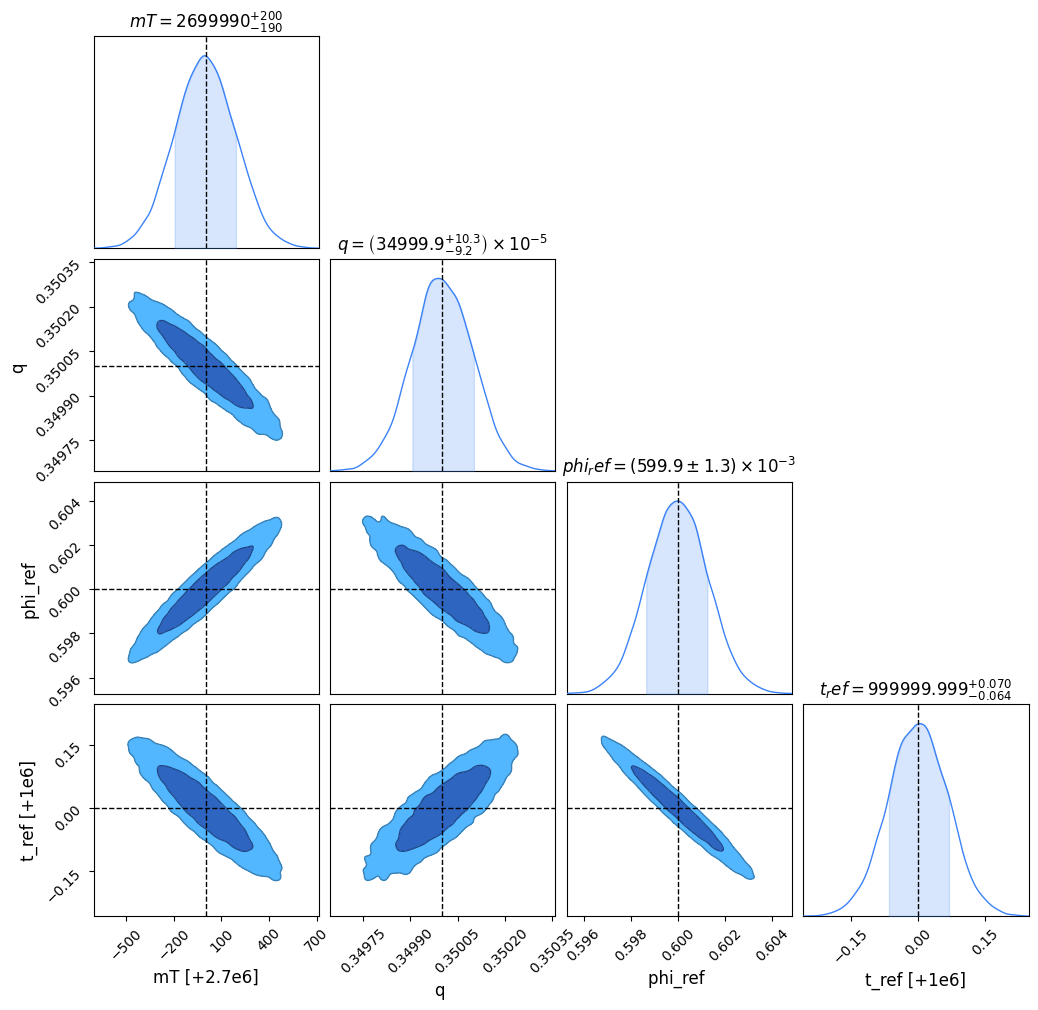

In [53]:
 
from chainconsumer import Chain, ChainConsumer, make_sample, Truth
import pandas as pd
samples = het_sampler.get_chain()["mbh"][:, 0].reshape(-1, 4)
df = pd.DataFrame(samples, columns=["mT", "q", "phi_ref", "t_ref"])
c = ChainConsumer()
c.add_chain(Chain(samples=df, name="An Example Contour"))
c.add_truth(Truth(location={"mT": injection_params_sub[0], "q": injection_params_sub[1], "phi_ref": injection_params_sub[2], "t_ref": injection_params_sub[3]}))
fig = c.plotter.plot()